In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# Cleaning up SHIPS Data

## Reading Data

In [2]:
PATH = '/home/disk/orca/adaley17/Research/Stress_Separation/' #PATH to the data
Cleaned_Data_Path = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/clean/' #Set path to save PNG Files

with open(PATH + 'lsdiaga_1982_2022_sat_ts_5day.txt', 'r') as file: # Open the file
    # Move the file pointer to the beginning of the file
    file.seek(0)
    lines = [file.readline().split() for _ in range(1925149)] # Read the first 1925149 lines


## Functions

In [3]:
# def extract_data_of_interest(start, lines,data_of_interest, increment):
#     """
#     This function extracts the data of interest from the text file. It takes the starting index,
#     the lines of the file and the data_of_interest array as input. To get more information about the 
#     raw data see the README file.
#     """
#     count=0 #Counter variable
#     for i in range(start, len(lines), increment): #The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period
#         # print(i, lines[i])
#         for j in range(len(lines[i])-1): #Here we are skipping the last element of the line which is the variable name
#             print(lines[i][j])
#             data_of_interest[count:,] = lines[i][j] #Assign the data to the data_of_interest array
#             count+=1 #Increment the counter

#         return data_of_interest; #Return the data of interest

# def extract_data_of_interest(start, lines,data_of_interest, increment):
#     """
#     This function extracts the data of interest from the text file. It takes the starting index,
#     the lines of the file and the data_of_interest array as input. To get more information about the 
#     raw data see the README file.
#     """
#     count=0 #Counter variable
#     for i in range(start, len(lines), increment): #The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period
#         data_of_interest[count*23:(count+1)*23, :] = np.array(lines[i][0:23]).reshape(-1, 1) #Reshape the array to be a column vector and assign it to the data array. The last element is ignored since it is a string

#         count+=1 #Increment the counter
#     return data_of_interest; #Return the data of interest

def extract_data_of_interest(start, lines, data_of_interest, increment):
    """
    This function extracts the data of interest from the text file. It takes the starting index,
    the lines of the file and the data_of_interest array as input. To get more information about the 
    raw data see the README file.
    """
    count = 0  # Counter variable
    for i in range(start, len(lines), increment):  # The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period
        if len(lines[i]) < 24:
            n = 24 - len(lines[i])
            lines[i] = ([np.nan] * n) + lines[i]
        data_of_interest[count*23:(count+1)*23, :] = np.array(lines[i][0:23]).reshape(-1, 1)  # Reshape the array to be a column vector and assign it to the data array
        count += 1  # Increment the counter
    return data_of_interest  # Return the data of interest


def extract_names_and_codes(start, lines, increment, num_predictions, data, choice):

    #Choice is the index of the variable name we want to extract, 0 for names and -2 for codes
    count=0 #Counter variable
    for i in range(start, len(lines), increment): #The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period
        # print(lines[i][choice])
        # names_and_codes = [lines[i][choice][:6]] * num_predictions
        names_and_codes = [lines[i][choice]] * num_predictions #every time period has 22 predictions but the storm name is the same for all of them
        data[count*23:(count+1)*23, :] = np.array(names_and_codes).reshape(-1, 1) #Reshape the array to be a column vector and assign it to the data array

        count+=1 #Increment the counter

    return data

def extract_original_info(start, lines, increment, num_predictions, data, choice):
    """
        Extracts initial information from the Header of each prediction
        3 - WSPD
        4 - LAT
        5 - LON
        6 - PRES
    """

    #Choice is the index of the variable name we want to extract, 0 for names and -2 for codes
    count=0 #Counter variable
    for i in range(start, len(lines), increment): #The data is stored in a 139x22 matrix, so we need to skip 139 lines to get to the next time period

        names_and_codes = [lines[i][choice]] * num_predictions #every time period has 22 predictions but the storm name is the same for all of them
        data[count*23:(count+1)*23, :] = np.array(names_and_codes).reshape(-1, 1) #Reshape the array to be a column vector and assign it to the data array

        count+=1 #Increment the counter

    return data

def get_original_times(start, lines, increment, data, num_predictions):
    
    count = 0
    for i in range(start, len(lines), increment):
        date_str = str(lines[i][1] + lines[i][2])
        date_obj = [np.datetime64(datetime.strptime(date_str, '%y%m%d%H'), 's')] * num_predictions
        data[count * num_predictions:(count + 1) * num_predictions, :] = np.array(date_obj).reshape(-1, 1)
        count += 1 
    return data

## Creating Empty Arrays and Setting Dependencies

In [4]:
# size = 13850 * 22 #Number of time periods * number of predictions per time period

num_predictions = 23 #Number of predictions per time period
num_time_periods = 13850 #Number of time periods
size = num_time_periods * num_predictions #Number of time periods * number of predictions per time period
increment = 139 #Number of lines per time period

#Creating Empty Arrays to store the data

##Original Data
original_times = np.full((size, 1), np.datetime64('NaT', 's'))
original_wspd = np.full((size, 1), np.nan)
original_lat = np.full((size, 1), np.nan)
original_lon = np.full((size, 1), np.nan)
original_pres = np.full((size, 1), np.nan)

##Predicted Data
times = np.full((size, 1), np.nan)
lat = np.full((size, 1), np.nan)
lon = np.full((size, 1), np.nan)
vmax = np.full((size, 1), np.nan)
mslp = np.full((size, 1), np.nan)
nature = np.full((size, 1), np.nan)
delta_intensity = np.full((size, 1), np.nan)
name = np.full((size, 1), 'np.nan')
code = np.full((size, 1), 'np.nan')
daily_sst_avg = np.full((size, 1), np.nan)
mid_level_rh = np.full((size, 1), np.nan)
vshear = np.full((size, 1), np.nan)
vert_vel = np.full((size, 1), np.nan)


## Extracting Data

In [5]:

# Extracting Data of interest

##Original Data
original_times = get_original_times(0, lines, increment, original_times, num_predictions)
original_wspd = extract_original_info(0, lines, increment, num_predictions, original_wspd, 3).astype(object)
original_lat = extract_original_info(0, lines, increment, num_predictions, original_lat, 4).astype(object)
original_lon = extract_original_info(0, lines, increment, num_predictions, original_lon, 5).astype(object)
original_pres = extract_original_info(0, lines, increment, num_predictions, original_pres, 6).astype(object)

# ##Predicted Data
name = extract_names_and_codes(0, lines,increment, num_predictions, name, 0).astype(object)
code = extract_names_and_codes(0, lines, increment, num_predictions, code, 7).astype(object)  # Fixed the bug by ensuring the function does not truncate the last 2 characters
times = extract_data_of_interest(1, lines, times , increment).astype(object)
vmax = extract_data_of_interest(2, lines, vmax, increment).astype(object)
mslp = extract_data_of_interest(3, lines, mslp, increment).astype(object)
nature = extract_data_of_interest(5, lines, nature, increment).astype(object)
delta_intensity = extract_data_of_interest(6, lines, delta_intensity, increment).astype(object)
lat = extract_data_of_interest(8, lines, lat, increment).astype(object)
lon = extract_data_of_interest(9, lines, lon, increment).astype(object)
daily_sst_avg = extract_data_of_interest(19, lines, daily_sst_avg, increment).astype(object)
mid_level_rh = extract_data_of_interest(29, lines, mid_level_rh, increment).astype(object) #Cheeck
vshear = extract_data_of_interest(64, lines, vshear, increment).astype(object) #Check
vert_vel = extract_data_of_interest(67, lines, vert_vel, increment).astype(object) #Check


## Cleaning Up Data

In [6]:

#Changing 9999 to nans and converting units
original_wspd[original_wspd == 9999] = np.nan
original_wspd = original_wspd * 0.514444 #Convert original_wspd from knots to meters per second
original_pres[original_pres == 9999] = np.nan
original_lat[original_lat == 9999] = np.nan
original_lon[original_lon == 9999] = np.nan

lat[lat == 9999] = np.nan
lon[lon == 9999] = np.nan
vmax[vmax== 9999] = np.nan
mslp[mslp == 9999] = np.nan
nature[nature == 9999] = np.nan
mid_level_rh[mid_level_rh == 9999] = np.nan
daily_sst_avg[daily_sst_avg == 9999] = np.nan
vshear[vshear == 9999] = np.nan
vert_vel[vert_vel == 9999] = np.nan

lat = lat.astype(float) / 10  #Convert latitude from tenths of degrees to degrees
lon = lon.astype(float) / 10 #Convert longitude from tenths of degrees to degrees
mslp = mslp.astype(float)
vmax = vmax.astype(float) * 0.514444 #Convert vmax from knots to meters per second
mid_level_rh = mid_level_rh.astype(float)
daily_sst_avg = pd.to_numeric(daily_sst_avg.flatten(), errors='coerce') / 10
vshear = (vshear/10) * 0.514444 # Convert vertical shear from knots to meters per second
vert_vel = (vert_vel / 100) * 0.514444 # Convert vertical velocity from knots to meters per second

nature[nature == '0'] = 'Wave'
nature[nature == '1'] = 'Tropical'
nature[nature == '2'] = 'Subtropical'
nature[nature == '3'] = 'Extratropical'





# daily_sst_avg[daily_sst_avg == 'DSTA'] = np.nan
# daily_sst_avg = pd.to_numeric(daily_sst_avg.flatten(), errors='coerce') / 10

# vshear[vshear == 9999] = np.nan
# vshear = vshear / 10
# vshear = vshear * 0.514444 # Convert vertical shear from knots to meters per second

# vert_vel[vert_vel == 9999] = np.nan
# vert_vel = vert_vel / 100
# vert_vel = vert_vel * 0.514444 # Convert vertical velocity from knots to meters per second




## Creating Dataframe, doing Final Clean and Saving

In [7]:

# Create a DataFrame with the extracted data
data = {
    'Original_Times': original_times.flatten(),
    'Original_Lat': original_lat.flatten(),
    'Original_Lon': original_lon.flatten(),
    'Original_WSPD': original_wspd.flatten(),
    'Original_Pres': original_pres.flatten(),
    'Name': name.flatten(),
    'Code': code.flatten(),
    'Times': times.flatten(),
    'Latitude': lat.flatten(),
    'Longitude': lon.flatten(),
    'Vmax': vmax.flatten(),
    'MSLP': mslp.flatten(),
    'Nature': nature.flatten(),
    'Delta_Intensity': delta_intensity.flatten(),
    'Daily_SST_Avg': daily_sst_avg.flatten(),
    'Mid_Level_RH': mid_level_rh.flatten(),
    'Vshear': vshear.flatten(),
    'Vert_Vel': vert_vel.flatten()
}

df = pd.DataFrame(data)

#Adjusting codes since the last two characters are being truncated
adjusted_code = extract_names_and_codes(0, lines, increment, num_predictions, code, 7).astype(object)
df['Code'] = adjusted_code.flatten()

df[df==9999] = np.nan

# #Saving
df.to_csv(Cleaned_Data_Path + 'cleaned_SHIPS_data.csv', index=True)

In [8]:
df.head()

,Original_Times,Original_Lat,Original_Lon,Original_WSPD,Original_Pres,Name,Code,Times,Latitude,Longitude,Vmax,MSLP,Nature,Delta_Intensity,Daily_SST_Avg,Mid_Level_RH,Vshear,Vert_Vel
0,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,0.0,21.7,87.1,10.28888,1005.0,1.0,0.0,27.1,57.0,15.227542,6.631183
3,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,6.0,22.2,86.5,12.86110,1004.0,0.0,5.0,27.8,53.0,15.536209,3.966363
4,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,12.0,22.6,85.8,15.43332,1003.0,0.0,10.0,27.9,56.0,15.330431,4.403641


In [12]:
# Filter the DataFrame for Times from 0 to 24 for each Code
filtered_df = df[(df['Times'] >= 0) & (df['Times'] <= 24)]

# Group by Code and extract the relevant columns
grouped_df = filtered_df.groupby('Code').apply(lambda x: x[['Original_Times','Times', 'Latitude', 'Longitude', 'Vmax', 'MSLP', 'Nature', 'Delta_Intensity', 'Daily_SST_Avg', 'Mid_Level_RH', 'Vshear', 'Vert_Vel']])

grouped_df

Original_Times Times  Latitude  Longitude      Vmax  \
Code                                                                       
AL011982 2      1982-06-02 12:00:00   0.0      21.7       87.1  10.28888   
         3      1982-06-02 12:00:00   6.0      22.2       86.5  12.86110   
         4      1982-06-02 12:00:00  12.0      22.6       85.8  15.43332   
         5      1982-06-02 12:00:00  18.0      22.8       85.0  20.57776   
         6      1982-06-02 12:00:00  24.0      23.2       84.2  25.72220   
...                             ...   ...       ...        ...       ...   
AL312020 302383 2020-11-18 12:00:00   0.0      13.7       89.0  12.86110   
         302384 2020-11-18 12:00:00   6.0       NaN        NaN       NaN   
         302385 2020-11-18 12:00:00  12.0       NaN        NaN       NaN   
         302386 2020-11-18 12:00:00  18.0       NaN        NaN       NaN   
         302387 2020-11-18 12:00:00  24.0       NaN        NaN       NaN   

                   MSLP Nature Delta_Intensity  Daily_SST_Avg  Mid_Level_RH  \
Code                                                                          
AL011982 2       1005.0    1.0             0.0           27.1          57.0   
         3       1004.0    0.0             5.0           27.8          53.0   
         4       1003.0    0.0            10.0           27.9          56.0   
         5       1001.0    0.0            20.0           27.2          59.0   
         6        995.0    0.0            30.0           26.7          53.0   
...                 ...    ...             ...            ...           ...   
AL312020 302383  1006.0   25.0             0.0           27.2          74.0   
         302384     NaN   25.0             NaN            NaN           NaN   
         302385     NaN   20.0             NaN            NaN           NaN   
         302386     NaN   19.0             NaN            NaN           NaN   
         302387     NaN   15.0             NaN            NaN           NaN   

                    Vshear  Vert_Vel  
Code                                  
AL011982 2       15.227542  6.631183  
         3       15.536209  3.966363  
         4       15.330431  4.403641  
         5       18.622873   5.37594  
         6       17.491096  4.156708  
...                    ...       ...  
AL312020 302383   7.202216  9.131381  
         302384        NaN       NaN  
         302385        NaN       NaN  
         302386        NaN       NaN  
         302387        NaN       NaN  

[69250 rows x 12 columns]

Number of unique codes: 610


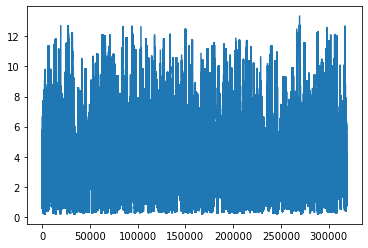

In [11]:
num_unique_codes = grouped_df.index.get_level_values('Code').nunique()
print(f"Number of unique codes: {num_unique_codes}")

In [71]:
times = np.full((len(lines[1])-1, 1), 'np.nan')
vmax = np.full((len(lines[2])-1, 1), 'np.nan')
mslp = np.full((len(lines[3])-1, 1), 'np.nan')
nature = np.full((len(lines[4])-1, 1), 'np.nan')
delta_intensity = np.full((len(lines[5])-1, 1), 'np.nan')
lat = np.full((len(lines[8])-1, 1), 'np.nan')
lon = np.full((len(lines[9])-1, 1), 'np.nan')
daily_sst_avg = np.full((len(lines[19])-1, 1), 'np.nan')
mid_level_rh = np.full((len(lines[29])-1, 1), np.nan)

shear = np.full((len(lines[64])-1, 1), np.nan)
""" Generalized 850-200 hPa shear magnitude (kt *10) vs time (takes into account all levels from 1000 to 100 hPa) """ 
vert_vel = np.full((len(lines[67])-1, 1), np.nan)


# Times
for i in range(len(lines[1])-1):
    times[i,:] = lines[1][i]

# Vmax
for i in range(len(lines[2])-1):
    vmax[i,:] = lines[2][i]

# MSLP
for i in range(len(lines[3])-1):
    mslp[i,:] = lines[3][i]

# Nature
for i in range(len(lines[4])-1):
    nature[i,:] = lines[4][i]

# Delta Intensity
for i in range(len(lines[5])-1):
    delta_intensity[i,:] = lines[5][i]

# Latitude
for i in range(len(lines[8])-1):
    lat[i,:] = lines[8][i]

# Longitude
for i in range(len(lines[9])-1):
    lon[i,:] = lines[9][i]

# Daily SST Avg
for i in range(len(lines[19])-1):
    # print(i)
    daily_sst_avg[i,:] = lines[19][i]

# Mid Level RH
for i in range(len(lines[29])-1):
    mid_level_rh[i,:] = float(lines[29][i])

# Shear
for i in range(len(lines[64])-1):
    shear[i,:] = float(lines[64][i])/10

# Vert Vel
for i in range(len(lines[67])-1):
    vert_vel[i,:] = float(lines[67][i])/100


    

In [73]:
daily_sst_avg.shape

(24, 1)

In [47]:
div_200

array([[ 64.],
       [ 65.],
       [ 84.],
       [ 70.],
       [ 51.],
       [114.],
       [ 42.],
       [ 27.],
       [ -7.],
       [  8.],
       [-17.],
       [-37.],
       [-48.],
       [-52.],
       [-25.],
       [-32.],
       [-41.],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])